<a href="https://colab.research.google.com/github/AnIsAsPe/ElementosEstadisticaMachineLearningPython/blob/master/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cargar bibiliotecas

In [62]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns  

# Cargar datos

Dataset
M. Cassotti, D. Ballabio, V. Consonni, A. Mauri, I. V. Tetko, R. Todeschini (2014). Prediction of acute aquatic toxicity towards daphnia magna using GA-kNN method, Alternatives to Laboratory Animals (ATLA), 42,31:41; doi: 10.1177/026119291404200106

In [16]:
#dataset: 
datos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00505/qsar_aquatic_toxicity.csv',
                    names=  ['TPSA(Tot)', 'SAacc', 'H-050', 'MLOGP', 
                             'RDCHI', 'GATS1p', 'nN', 'C-040','acuatic toxicity'],
                    sep=";", header=None)
                    
print(datos.shape)
datos.head()

(546, 9)


,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,acuatic toxicity
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


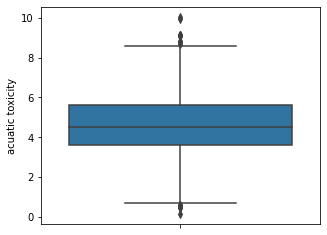

In [17]:
plt.figure(figsize=(5,4))
sns.boxplot(y='acuatic toxicity', data=datos)

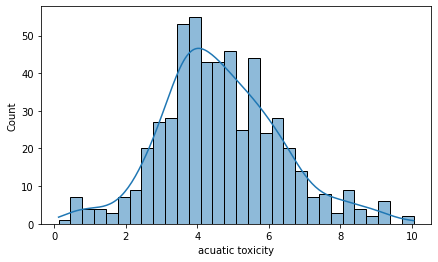

In [19]:
plt.figure(figsize=(7,4))
sns.histplot(x='acuatic toxicity', data=datos, bins=30 )
plt.show()

In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TPSA(Tot)         546 non-null    float64
 1   SAacc             546 non-null    float64
 2   H-050             546 non-null    int64  
 3   MLOGP             546 non-null    float64
 4   RDCHI             546 non-null    float64
 5   GATS1p            546 non-null    float64
 6   nN                546 non-null    int64  
 7   C-040             546 non-null    int64  
 8   acuatic toxicity  546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


# Separar datos en características y variable a predecir

In [28]:
y = datos['acuatic toxicity']
X = datos.drop('acuatic toxicity', axis=1)

# Normalizar las caractísticas

In [46]:
X_estandarizados=X.copy()
columnas = X.columns

scaler = StandardScaler()

X_estandarizados[columnas] = scaler.fit_transform(X[columnas])

In [60]:
regresion = LinearRegression().fit(X_estandarizados, y)
y_pred=regresion.predict(X_estandarizados)

coeficientes = pd.DataFrame({'coef':regresion.coef_,
                             'variable':list(columnas)})
coeficientes = coeficientes.sort_values('coef').reset_index(drop=True)
print('Intersept:', regresion.intercept_)
coeficientes

Intersept: 4.658421245421245


,coef,variable
0,-1.027069,SAacc
1,-0.313743,nN
2,-0.230415,GATS1p
3,0.002575,C-040
4,0.065686,H-050
5,0.416416,RDCHI
6,0.776318,MLOGP
7,1.270851,TPSA(Tot)


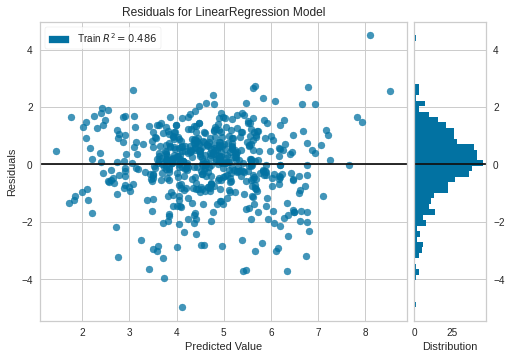

In [68]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_estandarizados, y)
visualizer.show()                

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


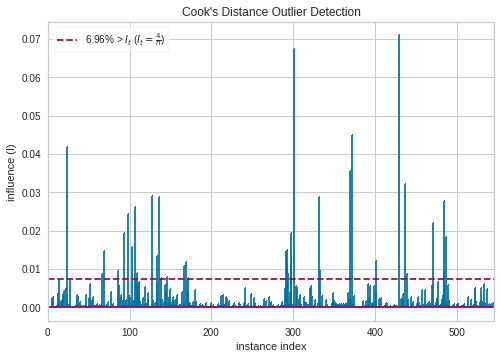

In [71]:
from yellowbrick.regressor import CooksDistance

visualizer = CooksDistance()
visualizer.fit(X_estandarizados, y)
visualizer.show()  


In [63]:
X_a = X_estandarizados
X_a['constant'] = 1
modelo = sm.OLS( y, X_a).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:       acuatic toxicity   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     63.50
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           8.83e-73
Time:                        03:25:47   Log-Likelihood:                -870.91
No. Observations:                 546   AIC:                             1760.
Df Residuals:                     537   BIC:                             1799.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TPSA(Tot)      1.2709      0.124     10.220      0.0

https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

